In [ ]:
# GBA 462 Lab 3

Liuyi Ye / Xinyi Wang

09/26/2023

The demo this week is to show you how to set up for data analysis  in Python. You can execute the codes on Google Colab.

The example is based on Francis Galton's (1886) dataset, which is used to study family heights. It borrows Python code from David Swanson's previous labs.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
galton_data = pd.read_csv('galton_data.csv')

In [ ]:
# A glance of what the data looks like
galton_data.head() # This displays the first few rows
galton_data.tail() # This displays the last few rows
# note: you can specify the number of rows you want in the parenthesis (e.g. galton_data.head(20))

,Unnamed: 0,Family,Father,Mother,Gender,Height,Kids,mid_parent
893,893,136A,68.5,65.0,M,68.5,8,66.75
894,894,136A,68.5,65.0,M,67.7,8,66.75
895,895,136A,68.5,65.0,F,64.0,8,66.75
896,896,136A,68.5,65.0,F,63.5,8,66.75
897,897,136A,68.5,65.0,F,63.0,8,66.75


In [ ]:
#'Unnamed: 0' is the index column,
# use the 'index' argument to avoid the index column when saving a pd dataframe
# pd.to_csv(index=False) to avoid this column

In [ ]:
# Let us quickly go through the types of each column
galton_data.dtypes
# Oh, looks like our data is an object type rather than numeric

Unnamed: 0      int64
Family         object
Father        float64
Mother        float64
Gender         object
Height        float64
Kids            int64
mid_parent    float64
dtype: object

In [ ]:
# We need to convert the data to numeric values using to_numeric function in Pandas
galton_data[['Father', 'Mother', 'Height', 'Kids']] = galton_data[['Father', 'Mother', 'Height', 'Kids']].apply(pd.to_numeric)
galton_data.describe() #Now we can look at the summary statistics

,Unnamed: 0,Father,Mother,Height,Kids,mid_parent
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.00000
mean,448.500000,69.232851,64.084410,66.760690,6.135857,66.65863
std,259.374568,2.470256,2.307025,3.582918,2.685156,1.75101
min,0.000000,62.000000,58.000000,56.000000,1.000000,62.00000
25%,224.250000,68.000000,63.000000,64.000000,4.000000,65.50000
50%,448.500000,69.000000,64.000000,66.500000,6.000000,66.75000
75%,672.750000,71.000000,65.500000,69.700000,8.000000,67.50000
max,897.000000,78.500000,70.500000,79.000000,15.000000,72.75000


In [ ]:
# What if we want to create a new column based on existing columns?
# Say, the average height of parents?
galton_data['mid_parent'] = (galton_data['Father'] + galton_data['Mother'])/2
galton_data.head(10)

,Unnamed: 0,Family,Father,Mother,Gender,Height,Kids,mid_parent
0,0,1,78.5,67.0,M,73.2,4,72.75
1,1,1,78.5,67.0,F,69.2,4,72.75
2,2,1,78.5,67.0,F,69.0,4,72.75
3,3,1,78.5,67.0,F,69.0,4,72.75
4,4,2,75.5,66.5,M,73.5,4,71.00
5,5,2,75.5,66.5,M,72.5,4,71.00
6,6,2,75.5,66.5,F,65.5,4,71.00
7,7,2,75.5,66.5,F,65.5,4,71.00
8,8,3,75.0,64.0,M,71.0,2,69.50
9,9,3,75.0,64.0,F,68.0,2,69.50


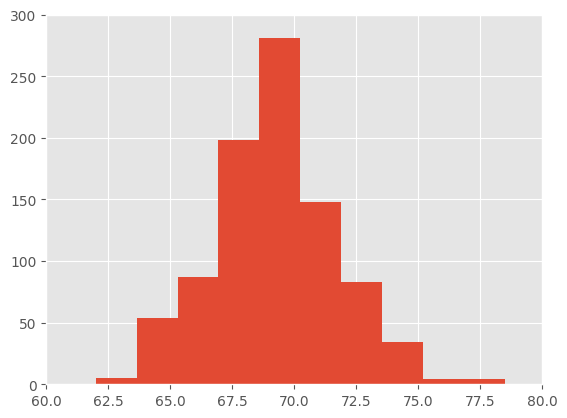

In [ ]:
# Histogram of father's heights
import matplotlib # Visualization
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
plt.hist(galton_data['Father'])
plt.axis([60,80,0,300])
plt.show()

(array([  5.,  26.,  93., 211., 174., 166., 176.,  39.,   6.,   2.]),
 array([56. , 58.3, 60.6, 62.9, 65.2, 67.5, 69.8, 72.1, 74.4, 76.7, 79. ]),
 <BarContainer object of 10 artists>)

(60.0, 80.0, 0.0, 300.0)

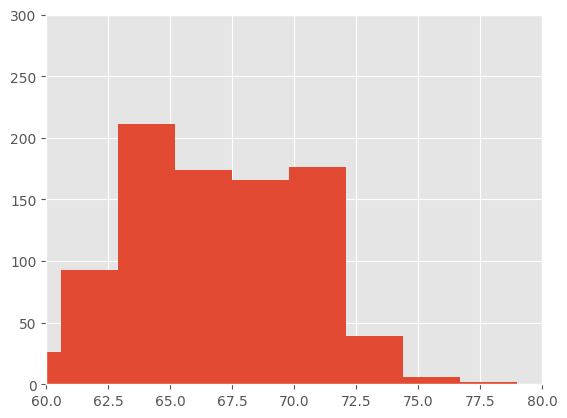

In [ ]:
# Histogram of child's heights
plt.hist(galton_data['Height'])
plt.axis([60,80,0,300])
plt.show()

Text(0.5, 0, 'Midpoint Parent Height - inches')

Text(0, 0.5, 'Child Height - inches')

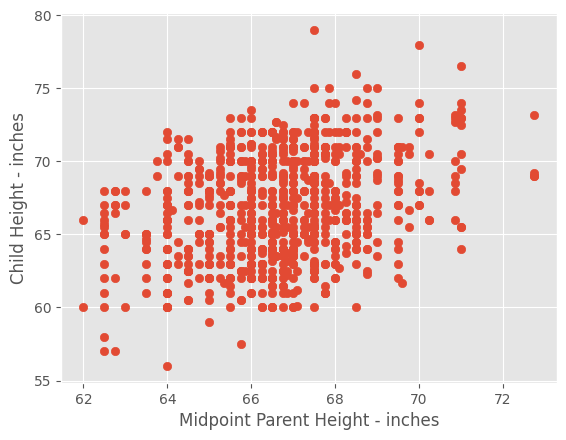

In [ ]:
# Visualize Two-Variable Data

# Scatter plot of mid_parent's vs. child's height
plt.scatter(galton_data['mid_parent'], galton_data['Height'])
# Change the labels
plt.xlabel("Midpoint Parent Height - inches")
plt.ylabel("Child Height - inches")
plt.show()

Text(0.5, 0, 'height')

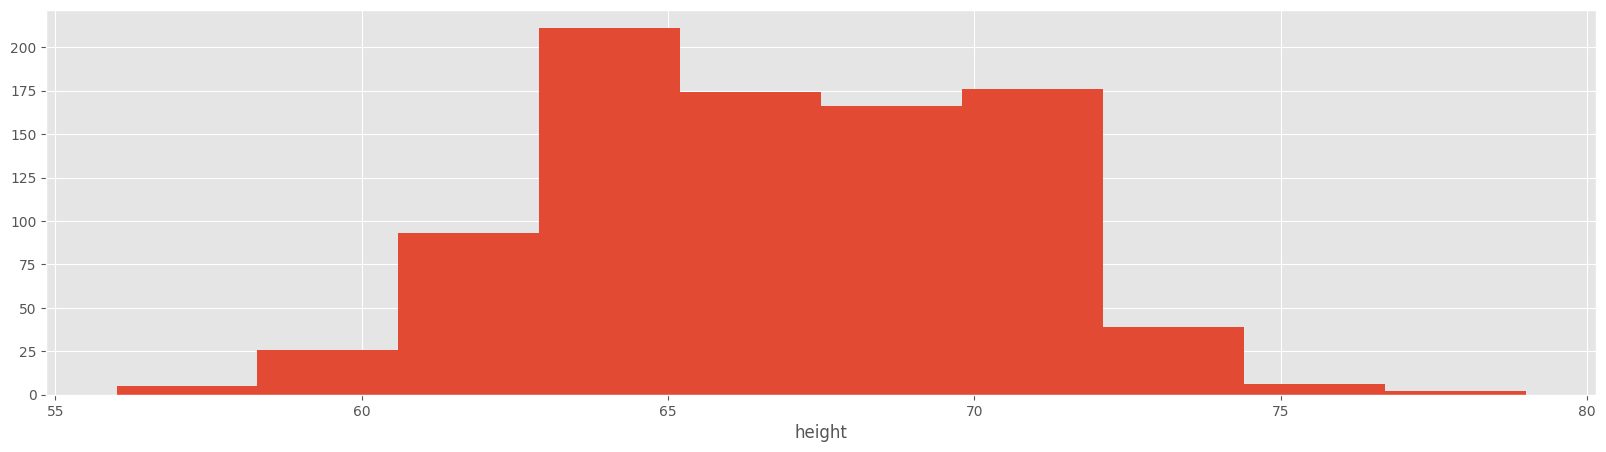

In [ ]:
plt.figure(figsize=(20,5))
galton_data['Height'].hist()
plt.xlabel('height')

Text(0.5, 0, 'Midpoint Parent Height - inches')

Text(0, 0.5, 'Child Height - inches')

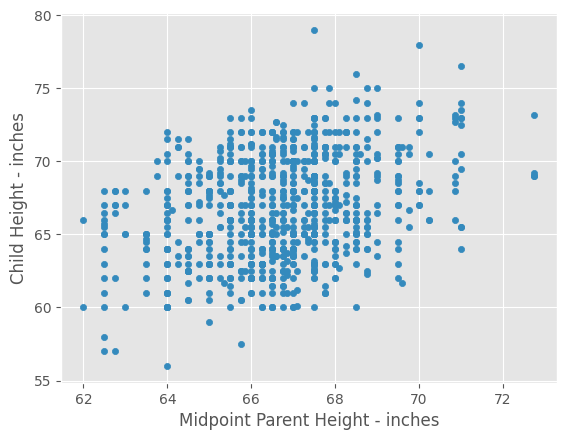

In [ ]:
# Equivalently, you can call this function
p1 = galton_data.plot.scatter(x='mid_parent',
                      y='Height')

p1.set_xlabel("Midpoint Parent Height - inches")
p1.set_ylabel("Child Height - inches")

In [ ]:
mask = galton_data.Height.between(70, 80)

In [ ]:
galton_data[mask]

,Unnamed: 0,Family,Father,Mother,Gender,Height,Kids,mid_parent
0,0,1,78.5,67.0,M,73.2,4,72.75
4,4,2,75.5,66.5,M,73.5,4,71.00
5,5,2,75.5,66.5,M,72.5,4,71.00
8,8,3,75.0,64.0,M,71.0,2,69.50
10,10,4,75.0,64.0,M,70.5,5,69.50
...,...,...,...,...,...,...,...,...
860,860,196,65.5,63.0,M,71.0,4,64.25
868,868,198,64.0,64.0,M,71.5,7,64.00
875,875,199,64.0,64.0,M,70.5,7,64.00
890,890,136A,68.5,65.0,M,72.0,8,66.75


In [ ]:
#subset data
galton_data[  (galton_data.Gender != 'F' )  &  ( galton_data.Height.between(70,80))   ][['Kids','mid_parent']]


,Kids,mid_parent
0,4,72.75
4,4,71.00
5,4,71.00
8,2,69.50
10,5,69.50
...,...,...
860,4,64.25
868,7,64.00
875,7,64.00
890,8,66.75


In [ ]:
len(galton_data)

898

In [ ]:
# Not required in this class, but just in case you want to save some changes to the dataset
galton_data.to_csv('galton_data.csv', index=False)

from google.colab import files
files.download('galton_data.csv') # and choose the local directory when the window pops up

In [ ]:
# Download stock data

In [ ]:
import scipy as sp
from scipy import optimize
from datetime import datetime
import yfinance as yf
# yahoo finance: https://pypi.org/project/yfinance/

In [ ]:
microsoft = yf.download("MSFT", start= datetime(1990,1,1), end = datetime(2000,2,1), interval = '1mo')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ibm = yf.download("IBM", start= datetime(1990,1,1), end = datetime(2000,2,1), interval = '1mo')
walmart = yf.download("WMT", start= datetime(1990,1,1), end = datetime(2000,2,1), interval = '1mo')
target = yf.download("TGT", start= datetime(1990,1,1), end = datetime(2000,2,1), interval = '1mo')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Looking up rows based on index values is faster than looking up rows based on column values.

microsoft.head()
#microsoft.reset_index()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-01,0.605903,0.666667,0.583333,0.642361,0.399049,2380968000
1990-02-01,0.642361,0.697917,0.640625,0.685764,0.426012,1429344000
1990-03-01,0.684028,0.812500,0.684028,0.769097,0.477780,1717819200
1990-04-01,0.762153,0.875000,0.758681,0.805556,0.500429,1200837600
1990-05-01,0.815972,1.093750,0.788194,1.013889,0.629850,1634767200


In [ ]:
#datetime index
microsoft.index


DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '1999-04-01', '1999-05-01', '1999-06-01', '1999-07-01',
               '1999-08-01', '1999-09-01', '1999-10-01', '1999-11-01',
               '1999-12-01', '2000-01-01'],
              dtype='datetime64[ns]', name='Date', length=121, freq=None)

In [ ]:
microsoft['date_str'] = microsoft.index.astype(str)


In [ ]:
microsoft['date_str']

Date
1990-01-01    1990-01-01
1990-02-01    1990-02-01
1990-03-01    1990-03-01
1990-04-01    1990-04-01
1990-05-01    1990-05-01
                 ...    
1999-09-01    1999-09-01
1999-10-01    1999-10-01
1999-11-01    1999-11-01
1999-12-01    1999-12-01
2000-01-01    2000-01-01
Name: date_str, Length: 121, dtype: object

In [ ]:
# date format Y-m-d -> Y-m

# first approach:
microsoft['date_str'].str[0:4] + microsoft['date_str'].str[5:7]

Date
1990-01-01    199001
1990-02-01    199002
1990-03-01    199003
1990-04-01    199004
1990-05-01    199005
               ...  
1999-09-01    199909
1999-10-01    199910
1999-11-01    199911
1999-12-01    199912
2000-01-01    200001
Name: date_str, Length: 121, dtype: object

In [ ]:
# second approach
microsoft.index.year.astype(str) + microsoft.index.month.astype(str)

Index(['19901', '19902', '19903', '19904', '19905', '19906', '19907', '19908',
       '19909', '199010',
       ...
       '19994', '19995', '19996', '19997', '19998', '19999', '199910',
       '199911', '199912', '20001'],
      dtype='object', name='Date', length=121)

In [ ]:
# convert datetime str to date time

microsoft['date'] = pd.to_datetime(microsoft['date_str'], format = '%Y-%m-%d')

In [ ]:
microsoft['date_str']

Date
1990-01-01    1990-01-01
1990-02-01    1990-02-01
1990-03-01    1990-03-01
1990-04-01    1990-04-01
1990-05-01    1990-05-01
                 ...    
1999-09-01    1999-09-01
1999-10-01    1999-10-01
1999-11-01    1999-11-01
1999-12-01    1999-12-01
2000-01-01    2000-01-01
Name: date_str, Length: 121, dtype: object

In [ ]:
# datetime64 and datetimeindex
# DatetimeIndex, you can use month/year directly
# datetime64 columns: use  column.dt.month
microsoft['date'].dt.year


Date
1990-01-01    1990
1990-02-01    1990
1990-03-01    1990
1990-04-01    1990
1990-05-01    1990
              ... 
1999-09-01    1999
1999-10-01    1999
1999-11-01    1999
1999-12-01    1999
2000-01-01    2000
Name: date, Length: 121, dtype: int64

In [ ]:
# sort dataframe by time

microsoft.sort_values(by = 'date', inplace=True)
microsoft.head()


# microsoft = microsoft.sort_values(by = 'date')


,Open,High,Low,Close,Adj Close,Volume,date_str,date
Date,,,,,,,,
1990-01-01,0.605903,0.666667,0.583333,0.642361,0.399049,2380968000,1990-01-01,1990-01-01
1990-02-01,0.642361,0.697917,0.640625,0.685764,0.426012,1429344000,1990-02-01,1990-02-01
1990-03-01,0.684028,0.812500,0.684028,0.769097,0.477780,1717819200,1990-03-01,1990-03-01
1990-04-01,0.762153,0.875000,0.758681,0.805556,0.500429,1200837600,1990-04-01,1990-04-01
1990-05-01,0.815972,1.093750,0.788194,1.013889,0.629850,1634767200,1990-05-01,1990-05-01


In [ ]:
# create lags and leads of a column
#  sort the dataframe first!


microsoft['Adj_Close_lead'] = microsoft['Adj Close'].shift(-1)
microsoft[['Adj Close', 'Adj_Close_lead']].head()

,Adj Close,Adj_Close_lead
Date,,
1990-01-01,0.399049,0.426012
1990-02-01,0.426012,0.477780
1990-03-01,0.477780,0.500429
1990-04-01,0.500429,0.629850
1990-05-01,0.629850,0.655735


In [ ]:
microsoft['return'] = 100 * (microsoft['Adj_Close_lead'] - microsoft['Adj Close']) / microsoft['Adj Close']

In [ ]:
microsoft['return']

Date
1990-01-01     6.756818
1990-02-01    12.151814
1990-03-01     4.740534
1990-04-01    25.861999
1990-05-01     4.109658
                ...    
1999-09-01     2.208403
1999-10-01    -1.637433
1999-11-01    28.230652
1999-12-01   -16.167034
2000-01-01          NaN
Name: return, Length: 121, dtype: float64

In [ ]:
microsoft = microsoft.dropna()
len(microsoft)

120

In [ ]:
microsoft.shape

(120, 10)

In [ ]:
def clean_stock(stock_df):
### stock_df is the data frame containing individual stocks
### first drop NaN (API returns NaN, not relevant)
  new_stock_df = stock_df.dropna()
  ### generate a column called 'date' with dtype = np.int32
  new_stock_df['date'] = new_stock_df.index
  new_stock_df['date'] = new_stock_df['date'].astype(str)
  new_stock_df['date'] = new_stock_df['date'].str[0:4] + new_stock_df['date'].str[5:7]
  new_stock_df['date'] = new_stock_df['date'].astype(np.int32)
  #new_stock_df = new_stock_df.sort_values(by = 'date')
  new_stock_df['lead_price'] = new_stock_df['Adj Close'].shift(-1)
  new_stock_df['return'] = 100 * (new_stock_df['lead_price'] - new_stock_df['Adj Close']) / new_stock_df['Adj Close']
  new_stock_df = new_stock_df.dropna()
  return new_stock_df


In [ ]:
microsoft_new = clean_stock(microsoft)


In [ ]:
microsoft_new

,Open,High,Low,Close,Adj Close,Volume,date_str,date,Adj_Close_lead,return,lead_price
Date,,,,,,,,,,,
1990-01-01,0.605903,0.666667,0.583333,0.642361,0.399049,2380968000,1990-01-01,199001,0.426012,6.756818,0.426012
1990-02-01,0.642361,0.697917,0.640625,0.685764,0.426012,1429344000,1990-02-01,199002,0.477780,12.151814,0.477780
1990-03-01,0.684028,0.812500,0.684028,0.769097,0.477780,1717819200,1990-03-01,199003,0.500429,4.740534,0.500429
1990-04-01,0.762153,0.875000,0.758681,0.805556,0.500429,1200837600,1990-04-01,199004,0.629850,25.861999,0.629850
1990-05-01,0.815972,1.093750,0.788194,1.013889,0.629850,1634767200,1990-05-01,199005,0.655735,4.109658,0.655735
...,...,...,...,...,...,...,...,...,...,...,...
1999-07-01,44.937500,50.375000,42.750000,42.906250,26.654316,1144701200,1999-07-01,199907,28.750942,7.865992,28.750942
1999-08-01,42.843750,48.187500,40.812500,46.281250,28.750942,1347994200,1999-08-01,199908,28.129725,-2.160687,28.129725
1999-09-01,46.156250,48.937500,44.406250,45.281250,28.129725,977273600,1999-09-01,199909,28.750942,2.208403,28.750942


In [ ]:
ibm_new = clean_stock(ibm)

In [ ]:
ibm_new

,Open,High,Low,Close,Adj Close,Volume,date,lead_price,return
Date,,,,,,,,,
1990-01-01,22.645794,24.288958,22.586042,23.571941,10.315396,163578921,199001,10.864501,5.323157
1990-02-01,23.571941,25.215105,23.303059,24.826721,10.864501,140005846,199002,11.238059,3.438336
1990-03-01,24.796844,26.141253,24.707218,25.364485,11.238059,134221046,199003,11.542507,2.709081
1990-04-01,25.125479,26.589388,25.095602,26.051624,11.542507,115173387,199004,12.707358,10.091839
1990-05-01,26.171127,29.188576,25.782743,28.680689,12.707358,156106293,199005,12.581964,-0.986782
...,...,...,...,...,...,...,...,...,...
1999-08-01,118.546844,123.924477,112.392448,119.084610,66.121376,134162053,199908,64.292908,-2.765321
1999-09-01,120.100380,131.632416,114.364243,115.678780,64.292908,155118140,199909,52.204784,-18.801644
1999-10-01,115.678780,117.829826,85.086044,93.929253,52.204784,319341809,199910,54.761894,4.898229
